# NAME:- Shekhar Dubey

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
import string
import os
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from tqdm import tqdm
import sqlite3

In [123]:
Edata=pd.read_csv('Womens_Clothing_E_Commerce_Reviews.csv')

In [124]:
Edata.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [125]:
Edata=Edata.drop(['Unnamed: 0'],axis=1)

In [126]:
Edata.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [127]:
Edata.columns=['Clothing_Id','Age','Title','Review_Text','Rating','Recommended_IND','Positive_Feedback_Count','Division_Name','Department_Name','Class_Name']

In [128]:
Edata.head()

,Clothing_Id,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [129]:
Edata.dtypes

Clothing_Id                 int64
Age                         int64
Title                      object
Review_Text                object
Rating                      int64
Recommended_IND             int64
Positive_Feedback_Count     int64
Division_Name              object
Department_Name            object
Class_Name                 object
dtype: object

In [130]:
Edata.describe()

,Clothing_Id,Age,Rating,Recommended_IND,Positive_Feedback_Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


# FINDING NULL VALUES

In [131]:
for i in Edata.columns[Edata.isna().any()].tolist():
    print(i,'has',Edata[Edata[i].isna()==True].shape[0],'Null Values')

Title has 3810 Null Values
Review_Text has 845 Null Values
Division_Name has 14 Null Values
Department_Name has 14 Null Values
Class_Name has 14 Null Values


In [132]:
Edata['class']="bad"
Edata.loc[Edata.Rating>3,['class']]='good'

In [133]:
def ret_rating(rating):
    if rating>3:
        return 'good'
    else:
        return 'bad'

In [134]:
Edata.head()

,Clothing_Id,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,class
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,good
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,good
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,bad
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,good
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,good


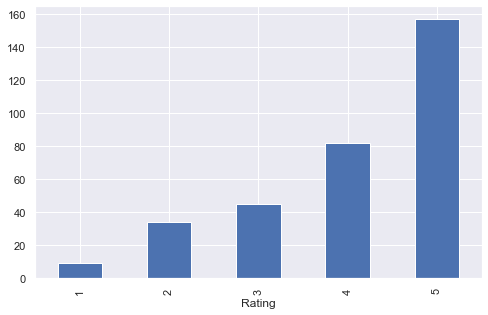

In [135]:
Edata[(Edata.Clothing_Id==1095)].groupby(['Rating'])['Rating'].count().plot(kind='bar')

In [136]:
Edata.corr()

,Clothing_Id,Age,Rating,Recommended_IND,Positive_Feedback_Count
Clothing_Id,1.000000,0.017972,-0.018879,-0.016206,0.046356
Age,0.017972,1.000000,0.026831,0.030622,0.043079
Rating,-0.018879,0.026831,1.000000,0.792336,-0.064961
Recommended_IND,-0.016206,0.030622,0.792336,1.000000,-0.069045
Positive_Feedback_Count,0.046356,0.043079,-0.064961,-0.069045,1.000000


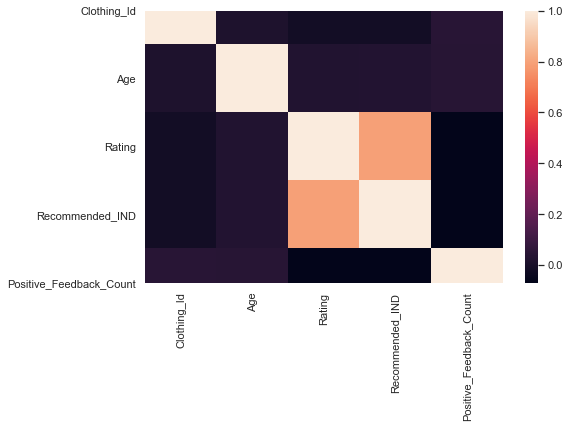

In [137]:
sns.heatmap(Edata.corr())

# DATA VISUALIZATION

In [138]:
Edata.head()

,Clothing_Id,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,class
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,good
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,good
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,bad
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,good
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,good


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  This is separate from the ipykernel package so we can avoid doing imports until


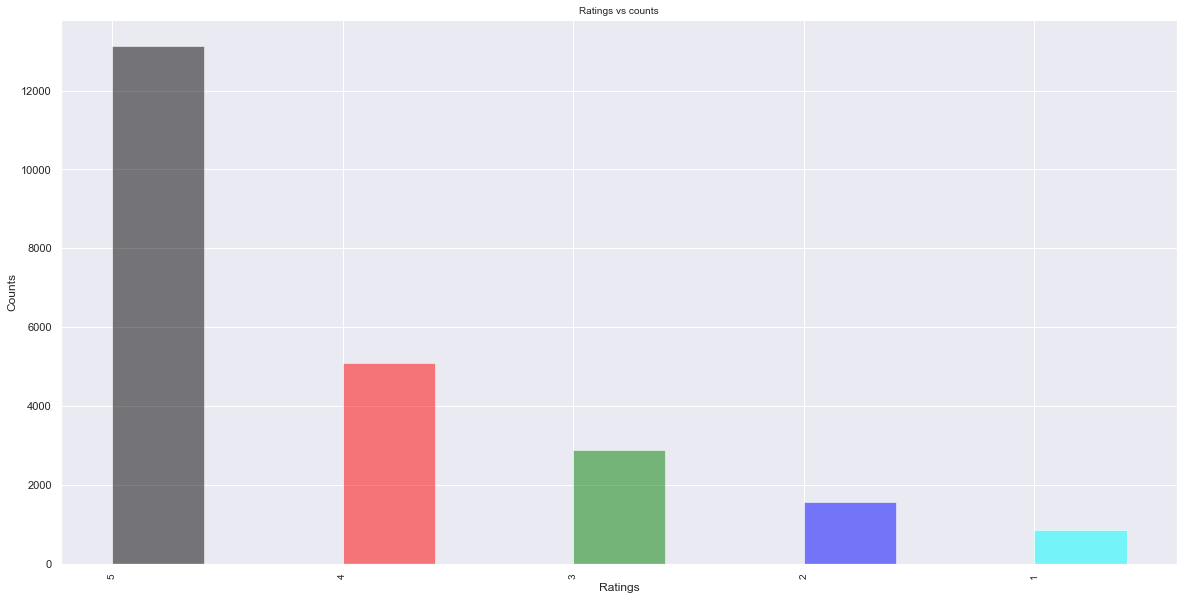

In [139]:
# DATA ANALYSIS

abc1=Edata.groupby(['Rating'])['Rating'].agg({'counts':'count'})
abc1 = abc1.sort_values(['counts'],ascending = False)
plt.rcParams["figure.figsize"] = (20,10)
y_pos = np.arange(len(abc1.index))
counts = abc1['counts'].tolist()
plt.bar(y_pos, counts,align='edge', width=0.4,alpha=0.5,color=['black','red','green','blue','cyan'])
plt.xticks(y_pos, abc1.index,rotation=90,fontsize=10)
plt.ylabel('Counts')
plt.xlabel('Ratings')
plt.title('Ratings vs counts',fontsize=10)
plt.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


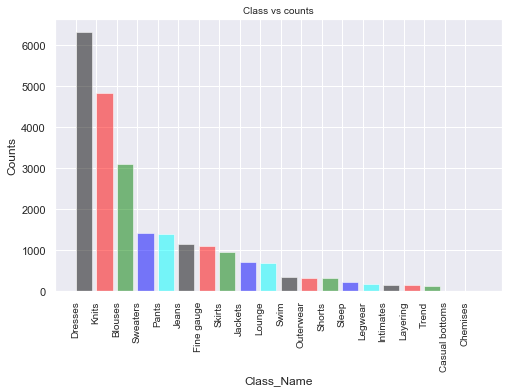

In [140]:
abc1=Edata.groupby(['Class_Name'])['Class_Name'].agg({'counts':'count'})
abc1 = abc1.sort_values(['counts'],ascending = False)
plt.rcParams["figure.figsize"] = (8,5)
y_pos = np.arange(len(abc1.index))
counts = abc1['counts'].tolist()
plt.bar(y_pos, counts,align='edge', alpha=0.5,color=['black','red','green','blue','cyan'])
plt.xticks(y_pos, abc1.index,rotation=90,fontsize=10)
plt.ylabel('Counts')
plt.xlabel('Class_Name')
plt.title('Class vs counts',fontsize=10)
plt.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


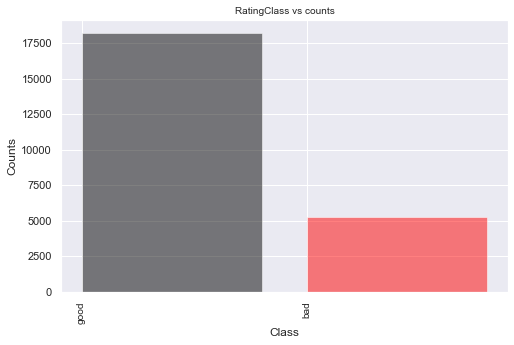

In [141]:
abc1=Edata.groupby(['class'])['class'].agg({'counts':'count'})
abc1 = abc1.sort_values(['counts'],ascending = False)
plt.rcParams["figure.figsize"] = (8,5)
y_pos = np.arange(len(abc1.index))
counts = abc1['counts'].tolist()
plt.bar(y_pos, counts,align='edge', alpha=0.5,color=['black','red','green','blue','cyan'])
plt.xticks(y_pos, abc1.index,rotation=90,fontsize=10)
plt.ylabel('Counts')
plt.xlabel('Class')
plt.title('RatingClass vs counts',fontsize=10)
plt.show()

# DROPPING NULL VALUES

In [142]:
# DROPPING NULL VALUES

EdataRaw = Edata.copy()

In [143]:
EdataRaw = EdataRaw.dropna(subset = ['Review_Text'])

In [144]:
EdataRaw.head()

,Clothing_Id,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,class
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,good
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,good
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,bad
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,good
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,good


# REMOVING PUNCTUATIONS

In [145]:
# REMOVING PUNCTUATIONS

EdataRaw['Review_Text'] = EdataRaw['Review_Text'].str.replace('[^\w\s]','')
EdataRaw['Review_Text'].head()

0    Absolutely wonderful  silky and sexy and comfo...
1    Love this dress  its sooo pretty  i happened t...
2    I had such high hopes for this dress and reall...
3    I love love love this jumpsuit its fun flirty ...
4    This shirt is very flattering to all due to th...
Name: Review_Text, dtype: object

# STOPWORDS REMOVAL

In [146]:
# STOPWORDS REMOVAL

from nltk.corpus import stopwords
stop = stopwords.words('english')
EdataRaw['Review_Text'] = EdataRaw['Review_Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
EdataRaw['Review_Text'].head()



0          Absolutely wonderful silky sexy comfortable
1    Love dress sooo pretty happened find store im ...
2    I high hopes dress really wanted work initiall...
3    I love love love jumpsuit fun flirty fabulous ...
4    This shirt flattering due adjustable front tie...
Name: Review_Text, dtype: object

# SPELLING CHECKS

In [147]:
# SPELLING CHECKS

from textblob import TextBlob
EdataRaw['Review_Text'][:4].apply(lambda x: str(TextBlob(x).correct()))

0            Absolutely wonderful silk sex comfortable
1    Love dress soon pretty happened find store in ...
2    I high hopes dress really wanted work initiall...
3    I love love love jumpsuit fun flirt fabulous e...
Name: Review_Text, dtype: object

# STEMMING 

In [148]:
# STEMMING

from nltk.stem import PorterStemmer
st = PorterStemmer()
EdataRaw['Review_Text'][:4].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                    absolut wonder silki sexi comfort
1    love dress sooo pretti happen find store im gl...
2    I high hope dress realli want work initi order...
3    I love love love jumpsuit fun flirti fabul eve...
Name: Review_Text, dtype: object

# LEMMATIZATION

In [149]:
# LEMMATIZATION

nltk.download('wordnet')
from textblob import Word
EdataRaw['Review_Text'] = EdataRaw['Review_Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
EdataRaw['Review_Text'].head()

[nltk_data] Downloading package wordnet to C:\Users\SHEKHAR
[nltk_data]     DUBEY\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0          Absolutely wonderful silky sexy comfortable
1    Love dress sooo pretty happened find store im ...
2    I high hope dress really wanted work initially...
3    I love love love jumpsuit fun flirty fabulous ...
4    This shirt flattering due adjustable front tie...
Name: Review_Text, dtype: object

# TF-IDF

In [150]:
# CALCULATING TERM FREQUENCY

tf1 = (EdataRaw['Review_Text'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,petite,3
1,bc,2
2,would,2
3,Love,1
4,knee,1
5,someone,1
6,dress,1
7,definitely,1
8,truly,1
9,bought,1


In [151]:
# CALCULATING INVERSE DOCUMENT FREQUENCY

for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(EdataRaw.shape[0]/(len(EdataRaw[EdataRaw['Review_Text'].str.contains(word)])))

tf1

,words,tf,idf
0,petite,3,2.450396
1,bc,2,4.984093
2,would,2,1.594141
3,Love,1,2.883900
4,knee,1,3.538313
5,someone,1,4.061371
6,dress,1,1.173138
7,definitely,1,2.886273
8,truly,1,4.909524
9,bought,1,2.182885


In [152]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(EdataRaw['Review_Text'])
train_vect

<22641x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 443518 stored elements in Compressed Sparse Row format>

# BAG OF WORDS

In [153]:
# BAG OF WORDS

from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow = bow.fit_transform(EdataRaw['Review_Text'])
train_bow

<22641x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 519187 stored elements in Compressed Sparse Row format>

# SENTIMENT ANALYSIS

In [154]:
EdataRaw['Review_Text'][:4].apply(lambda x: TextBlob(x).sentiment)

0     (0.6333333333333333, 0.9333333333333332)
1    (0.31875000000000003, 0.7250000000000001)
2    (0.08229978354978354, 0.3458658008658009)
3                                 (0.5, 0.625)
Name: Review_Text, dtype: object

In [155]:
EdataRaw['sentiment'] = EdataRaw['Review_Text'].apply(lambda x: TextBlob(x).sentiment[0] )
EdataRaw[['Review_Text','sentiment']].head()

,Review_Text,sentiment
0,Absolutely wonderful silky sexy comfortable,0.633333
1,Love dress sooo pretty happened find store im ...,0.318750
2,I high hope dress really wanted work initially...,0.082300
3,I love love love jumpsuit fun flirty fabulous ...,0.500000
4,This shirt flattering due adjustable front tie...,0.458333


# USING WORD2VEC

In [186]:

from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)



(400000, 100)

In [187]:
from gensim.models import KeyedVectors 
filename = 'glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [189]:
model['love']

array([ 2.5975e-01,  5.5833e-01,  5.7986e-01, -2.1361e-01,  1.3084e-01,
        9.4385e-01, -4.2817e-01, -3.7420e-01, -9.4499e-02, -4.3344e-01,
       -2.0937e-01,  3.4702e-01,  8.2516e-02,  7.9735e-01,  1.6606e-01,
       -2.6878e-01,  5.8830e-01,  6.7397e-01, -4.9965e-01,  1.4764e+00,
        5.5261e-01,  2.5295e-02, -1.6068e-01, -1.3878e-01,  4.8686e-01,
        1.1420e+00,  5.6195e-02, -7.3306e-01,  8.6932e-01, -3.5892e-01,
       -5.1877e-01,  9.0402e-01,  4.9249e-01, -1.4915e-01,  4.8493e-02,
        2.6096e-01,  1.1352e-01,  4.1275e-01,  5.3803e-01, -4.4950e-01,
        8.5733e-02,  9.1184e-02,  5.0177e-03, -3.4645e-01, -1.1058e-01,
       -2.2235e-01, -6.5290e-01, -5.1838e-02,  5.3791e-01, -8.1040e-01,
       -1.8253e-01,  2.4194e-01,  5.4855e-01,  8.7731e-01,  2.2165e-01,
       -2.7124e+00,  4.9405e-01,  4.4703e-01,  5.5882e-01,  2.6076e-01,
        2.3760e-01,  1.0668e+00, -5.6971e-01, -6.4960e-01,  3.3511e-01,
        3.4609e-01,  1.1033e+00,  8.5261e-02,  2.4847e-02, -4.54

In [190]:
model['someone']

array([ 0.30294  ,  0.62819  ,  0.87091  , -0.28145  , -0.0057478,
        0.89183  , -0.20067  ,  0.093572 ,  0.65012  ,  0.12131  ,
        0.35646  ,  0.51811  , -0.013892 ,  0.094272 ,  0.47124  ,
       -0.21374  ,  0.039778 ,  0.3591   , -0.81531  ,  0.73258  ,
       -0.36667  ,  0.078941 , -0.39824  , -1.049    ,  0.3121   ,
       -0.17557  , -0.45108  , -0.5476   ,  0.27331  , -0.28563  ,
        0.49494  ,  1.3718   ,  0.54308  , -0.034511 ,  0.25806  ,
       -0.20741  , -0.53448  , -0.2577   ,  0.62239  ,  0.0022421,
       -0.37712  ,  0.45728  ,  0.59663  , -0.58041  , -0.78896  ,
        0.23352  , -0.31065  , -0.39704  , -0.42402  , -1.7943   ,
        0.4088   , -0.11747  ,  0.5114   ,  1.0734   , -0.27628  ,
       -1.9071   , -0.0090912, -0.25235  ,  1.2969   ,  0.11028  ,
        0.41348  ,  1.07     , -0.31477  , -0.080091 ,  0.2448   ,
        0.33522  ,  1.154    , -0.054032 , -0.17202  ,  0.12164  ,
       -0.55567  , -0.34784  , -0.053986 , -0.37018  ,  0.4448

# TO REPRESENT 'someone love'

In [191]:
model['someone'] + model['love']

array([ 0.56269   ,  1.18652   ,  1.4507699 , -0.49506   ,  0.12509221,
        1.83568   , -0.62883997, -0.280628  ,  0.555621  , -0.31213   ,
        0.14709   ,  0.86512995,  0.068624  ,  0.891622  ,  0.6373    ,
       -0.48251998,  0.628078  ,  1.03307   , -1.31496   ,  2.20898   ,
        0.18593997,  0.10423601, -0.55892   , -1.18778   ,  0.79896   ,
        0.96642995, -0.394885  , -1.2806599 ,  1.14263   , -0.64454997,
       -0.02382997,  2.27582   ,  1.0355699 , -0.183661  ,  0.306553  ,
        0.05355002, -0.42095998,  0.15505001,  1.16042   , -0.4472579 ,
       -0.291387  ,  0.548464  ,  0.6016477 , -0.92686   , -0.89953995,
        0.01117   , -0.96355   , -0.44887802,  0.11388999, -2.6047    ,
        0.22627   ,  0.12447   ,  1.05995   ,  1.95071   , -0.05462998,
       -4.6195    ,  0.4849588 ,  0.19468   ,  1.85572   ,  0.37104002,
        0.65108   ,  2.1368    , -0.88448   , -0.729691  ,  0.57991004,
        0.68131   ,  2.2573    ,  0.031229  , -0.147173  , -0.33

# APPLYING MODEL

In [199]:
import warnings 
warnings.filterwarnings("ignore") # To take care of warnings
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.metrics import accuracy_score

In [202]:
x_train1,x_test1 = train_test_split(EdataRaw[['Review_Text','Recommended_IND']],test_size=0.2)

In [203]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
tf_idf_vect.fit_transform(x_train1['Review_Text'])
final_tf_idf = tf_idf_vect.transform(EdataRaw['Review_Text'].values)
print("The shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("The number of unique words ",final_tf_idf.get_shape()[1])

The shape of out text TFIDF vectorizer  (22641, 242437)
The number of unique words  242437


In [205]:
type(final_tf_idf)

scipy.sparse.csr.csr_matrix

In [209]:
EdataRaw['Class_Ind']=1
EdataRaw.loc[EdataRaw['class']=='bad',['Class_Ind']]=0

In [210]:
EdataRaw.head()

,Clothing_Id,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,class,sentiment,Class_Ind
0,767,33,NaN,Absolutely wonderful silky sexy comfortable,4,1,0,Initmates,Intimate,Intimates,good,0.633333,1
1,1080,34,NaN,Love dress sooo pretty happened find store im ...,5,1,4,General,Dresses,Dresses,good,0.318750,1
2,1077,60,Some major design flaws,I high hope dress really wanted work initially...,3,0,0,General,Dresses,Dresses,bad,0.082300,0
3,1049,50,My favorite buy!,I love love love jumpsuit fun flirty fabulous ...,5,1,0,General Petite,Bottoms,Pants,good,0.500000,1
4,847,47,Flattering shirt,This shirt flattering due adjustable front tie...,5,1,6,General,Tops,Blouses,good,0.458333,1


In [211]:
import scipy 
from scipy.sparse import hstack
Final_Data = hstack((final_tf_idf,scipy.sparse.csr_matrix(EdataRaw['Recommended_IND']).T))

In [212]:
Final_Data.shape

(22641, 242438)

In [213]:
X_tr, X_test, y_tr, y_test = train_test_split(Final_Data, EdataRaw['Class_Ind'], test_size=0.3, random_state=0)

In [218]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB
C = [10**x for x in range(-4,4)]
tuned_parameters = [{'alpha':C}]
model = GridSearchCV(BernoulliNB(binarize=0.0, class_prior=None, fit_prior=True), tuned_parameters, scoring = 'f1_macro',cv=5,return_train_score=True)
model.fit(X_tr,y_tr)
cv_scores = model.cv_results_['mean_test_score']
train_scores = model.cv_results_['mean_train_score']

# FINAL INFERENCES

In [237]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
PD_VALUES = model.predict(X_test)
f1_score(y_test, PD_VALUES, average='macro')

0.8128384728818436

In [238]:
PD_VALUES_TRN = model.predict(X_tr)

In [239]:
accuracy_score(y_tr, PD_VALUES_TRN)

0.9967819283190308

In [240]:
accuracy_score(y_test, PD_VALUES)

0.8583836302075666

[[1240  365]
 [ 597 4591]]


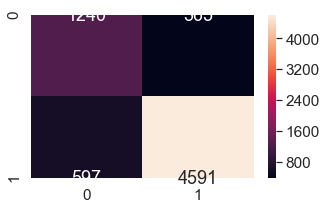

In [241]:
cm = metrics.confusion_matrix(y_test, PD_VALUES)
print(cm)
df_cm = pd.DataFrame(cm, range(2), 
                     range(2))
plt.figure(figsize = (5,3))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size":18},fmt='g')